<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(0_4)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_0.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0.4_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,37.000675,48.542292,54.047076,-0.778336,148.811708,149.504143,-0.692435
1,0.0,1.0,36.994238,81.552361,46.553283,-0.965421,174.134461,175.205531,-1.071069
2,0.0,2.0,82.677858,33.858480,75.266410,-1.769653,200.033097,201.880296,-1.847199
3,0.0,3.0,77.205980,58.573553,24.407411,-0.913932,169.273011,170.202943,-0.929932
4,0.0,4.0,37.601660,29.980274,40.494407,-2.483709,115.592632,117.812823,-2.220191
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,87.819664,51.847645,76.408522,0.146712,226.222542,226.656538,-0.433995
119996,999.0,116.0,69.178297,28.740463,22.633550,0.351464,130.903773,131.146939,-0.243165
119997,999.0,117.0,67.318082,34.924121,66.372638,2.166960,180.781800,179.066778,1.715022
119998,999.0,118.0,60.625803,27.047575,41.564146,-0.025324,139.212200,139.704026,-0.491826


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    37.000675  48.542292  54.047076  ...  148.811708  149.504143 -0.692435
      1.0    36.994238  81.552361  46.553283  ...  174.134461  175.205531 -1.071069
      2.0    82.677858  33.858480  75.266410  ...  200.033097  201.880296 -1.847199
      3.0    77.205980  58.573553  24.407411  ...  169.273011  170.202943 -0.929932
      4.0    37.601660  29.980274  40.494407  ...  115.592632  117.812823 -2.220191
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  87.819664  51.847645  76.408522  ...  226.222542  226.656538 -0.433995
      116.0  69.178297  28.740463  22.633550  ...  130.903773  131.146939 -0.243165
      117.0  67.318082  34.924121  66.372638  ...  180.781800  179.066778  1.715022
      118.0  60.625803  27.047575  41.564146  ...  139.212200  139.704026 -0.491826
      119.0  24.219710  53.514241  81.641249  ...  171.310183  169.219794  2.090389

[120000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    37.000675  48.542292  54.047076  ...  148.811708  149.504143 -0.692435
      1.0    36.994238  81.552361  46.553283  ...  174.134461  175.205531 -1.071069
      2.0    82.677858  33.858480  75.266410  ...  200.033097  201.880296 -1.847199
      3.0    77.205980  58.573553  24.407411  ...  169.273011  170.202943 -0.929932
      4.0    37.601660  29.980274  40.494407  ...  115.592632  117.812823 -2.220191
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  87.819664  51.847645  76.408522  ...  226.222542  226.656538 -0.433995
      116.0  69.178297  28.740463  22.633550  ...  130.903773  131.146939 -0.243165
      117.0  67.318082  34.924121  66.372638  ...  180.781800  179.066778  1.715022
      118.0  60.625803  27.047575  41.564146  ...  139.212200  139.704026 -0.491826
      119.0  24.219710  53.514241  81.641249  ...  171.310183  169.219794  2.090389

[120000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,37.000675,48.542292,54.047076,-0.778336,148.811708,149.504143,-0.692435
1,0.0,1.0,36.994238,81.552361,46.553283,-0.965421,174.134461,175.205531,-1.071069
2,0.0,2.0,82.677858,33.858480,75.266410,-1.769653,200.033097,201.880296,-1.847199
3,0.0,3.0,77.205980,58.573553,24.407411,-0.913932,169.273011,170.202943,-0.929932
4,0.0,4.0,37.601660,29.980274,40.494407,-2.483709,115.592632,117.812823,-2.220191
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,87.819664,51.847645,76.408522,0.146712,226.222542,226.656538,-0.433995
119996,999.0,116.0,69.178297,28.740463,22.633550,0.351464,130.903773,131.146939,-0.243165
119997,999.0,117.0,67.318082,34.924121,66.372638,2.166960,180.781800,179.066778,1.715022
119998,999.0,118.0,60.625803,27.047575,41.564146,-0.025324,139.212200,139.704026,-0.491826


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    37.000675  48.542292  54.047076  ...  148.811708  149.504143 -0.692435
      1.0    36.994238  81.552361  46.553283  ...  174.134461  175.205531 -1.071069
      2.0    82.677858  33.858480  75.266410  ...  200.033097  201.880296 -1.847199
      3.0    77.205980  58.573553  24.407411  ...  169.273011  170.202943 -0.929932
      4.0    37.601660  29.980274  40.494407  ...  115.592632  117.812823 -2.220191
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  87.819664  51.847645  76.408522  ...  226.222542  226.656538 -0.433995
      116.0  69.178297  28.740463  22.633550  ...  130.903773  131.146939 -0.243165
      117.0  67.318082  34.924121  66.372638  ...  180.781800  179.066778  1.715022
      118.0  60.625803  27.047575  41.564146  ...  139.212200  139.704026 -0.491826
      119.0  24.219710  53.514241  81.641249  ...  171.310183  169.219794  2.090389

[120000 rows x 7 columns]

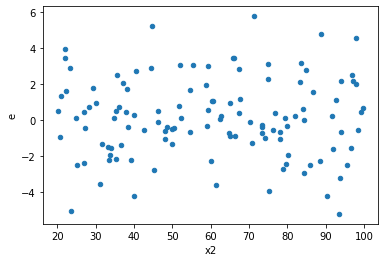

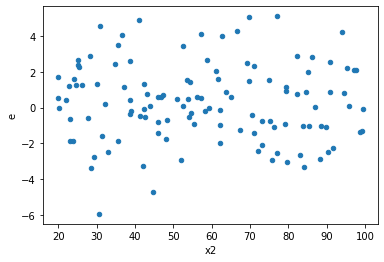

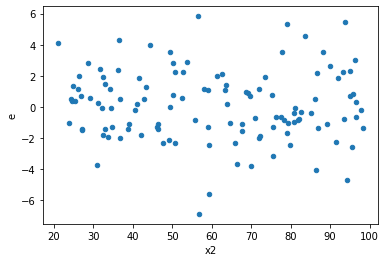

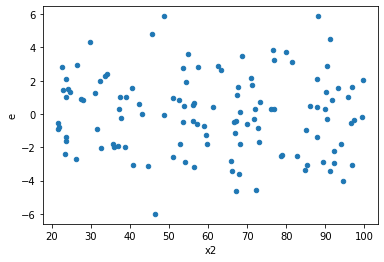

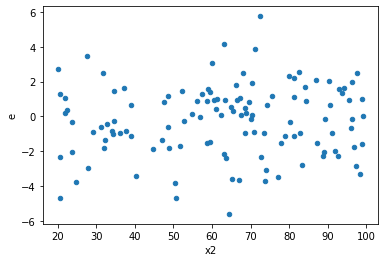

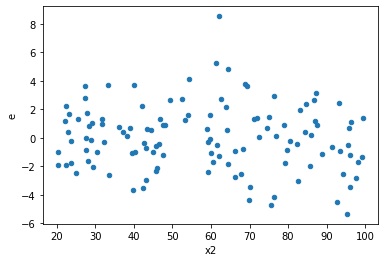

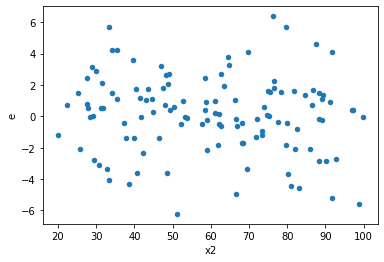

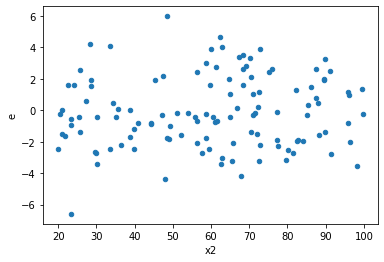

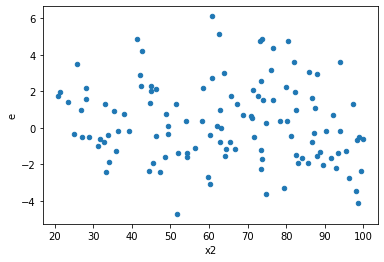

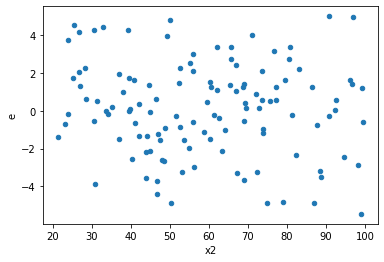

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,58.0,56.0,260.56272895001587,383.68251372142635,4.492460843965791,6.851473459311185,1.5251047693635407,0.11485125112159134,0.9425743744392043,0.05742562556079567,Reject005=1 : Homoscedasticity
1.0,40.0,74.0,132.6127067328264,425.15189504638,3.3153176683206604,5.745295879005135,1.7329548639950858,0.041080207794947254,0.9794598961025264,0.020540103897473627,Reject005=0 : Heteroscedasticity
2.0,56.0,58.0,256.58762422154086,292.8136412765577,4.581921861098944,5.048511056492374,1.1018326391278794,0.7143657285404057,0.6428171357297972,0.35718286427020285,Reject005=1 : Homoscedasticity
4.0,59.0,55.0,273.48110428522756,294.32495172691654,4.635272953986908,5.351362758671209,1.1544870845347686,0.592101446791832,0.703949276604084,0.296050723395916,Reject005=1 : Homoscedasticity
12.0,61.0,53.0,269.9645913628897,314.0199921371568,4.425649038735896,5.924905512021827,1.3387653336637297,0.27926944386067043,0.8603652780696648,0.13963472193033521,Reject005=1 : Homoscedasticity
13.0,71.0,43.0,312.7004275874413,301.11216259565,4.404231374471005,7.002608432456976,1.5899728776847162,0.10333878414736852,0.9483306079263157,0.05166939207368426,Reject005=1 : Homoscedasticity
18.0,48.0,66.0,214.59929669451265,315.0640516913859,4.47081868113568,4.773697752899786,1.0677457739545744,0.7965503317379585,0.6017248341310207,0.39827516586897926,Reject005=1 : Homoscedasticity
19.0,52.0,62.0,265.3033770767186,398.6797653920209,5.101988020706127,6.430318796645499,1.2603555262278971,0.38099099847249507,0.8095045007637525,0.19049549923624753,Reject005=1 : Homoscedasticity
22.0,56.0,58.0,196.5159657724312,275.54326395161235,3.5092136745077,4.750745930200213,1.353792151418846,0.25483750380519,0.872581248097405,0.127418751902595,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,58.0,56.0,260.56272895001587,383.68251372142635,4.492460843965791,6.851473459311185,1.5251047693635407,0.11485125112159134,Reject005=1 : Homoscedasticity
1.0,40.0,74.0,132.6127067328264,425.15189504638,3.3153176683206604,5.745295879005135,1.7329548639950858,0.041080207794947254,Reject005=0 : Heteroscedasticity
2.0,56.0,58.0,256.58762422154086,292.8136412765577,4.581921861098944,5.048511056492374,1.1018326391278794,0.7143657285404057,Reject005=1 : Homoscedasticity
3.0,49.0,65.0,245.09744342917728,242.82775252477745,5.001988641411781,3.7358115773042684,0.7468652660214474,0.2871747788277899,Reject005=1 : Homoscedasticity
4.0,59.0,55.0,273.48110428522756,294.32495172691654,4.635272953986908,5.351362758671209,1.1544870845347686,0.592101446791832,Reject005=1 : Homoscedasticity
5.0,62.0,52.0,366.82087578557304,198.76326083855136,5.916465738476984,3.8223704007413724,0.6460563738049003,0.09948620959029864,Reject005=1 : Homoscedasticity
6.0,61.0,53.0,291.0117192989827,236.03976819803273,4.7706839229341425,4.4535805320383535,0.9335308320529525,0.7915659815854683,Reject005=1 : Homoscedasticity
7.0,42.0,72.0,195.57361137348693,329.80277582250443,4.656514556511594,4.580594108645895,0.9836958637314828,0.9717592897281074,Reject005=1 : Homoscedasticity
8.0,53.0,61.0,196.3353565245203,215.80344527121298,3.7044406891418924,3.5377613978887372,0.9550055446314177,0.867942006454193,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      917
Reject005=0 : Heteroscedasticity     83
Name: Result_test, dtype: int64